In [45]:
import pymc
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [80]:
# These are unobserved stochastic PyMC variables
@pymc.stochastic(dtype=np.float64)
def hyperpriors(value=[1.0, 1.0]):
    a, b = value[0], value[1]
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

In [81]:
a = hyperpriors[0]
b = hyperpriors[1]

In [106]:
# This is the stuff we observed
#trials = np.array([67668, 65082, 63556])
#successes = np.array([4568, 5818, 4786])

trials = np.array([1000, 10000])
successes = np.array([470, 5300])

In [107]:
sizes = trials.shape[0]

In [108]:
# This is what we don't know but would line to find out
true_rates = pymc.Beta('true_rates', a, b, size=sizes)

In [109]:
# The observed values are also stochastic variables, and depended on the hyperpriors
observed_values = pymc.Binomial('observed_values', trials, true_rates, value=successes, 
                                observed=True, size=sizes)

In [110]:
model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

In [111]:
mcmc.sample(iter=1e6, burn=5e5, thin=10)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 115.2 sec

In [112]:
posteriors = []
for i in range(sizes):
    posteriors.append(mcmc.trace('true_rates')[:][:,i])

In [113]:
mcmc.trace('true_rates')[:].mean(axis=0)

array([ 0.47394387,  0.52960626])

In [123]:
print ((mcmc.trace('true_rates')[:][:,0] - mcmc.trace('true_rates')[:][:,1]) > 0).mean()
print ((12*mcmc.trace('true_rates')[:][:,0] - 10*mcmc.trace('true_rates')[:][:,1]) > 0).mean()

0.00024
0.98046


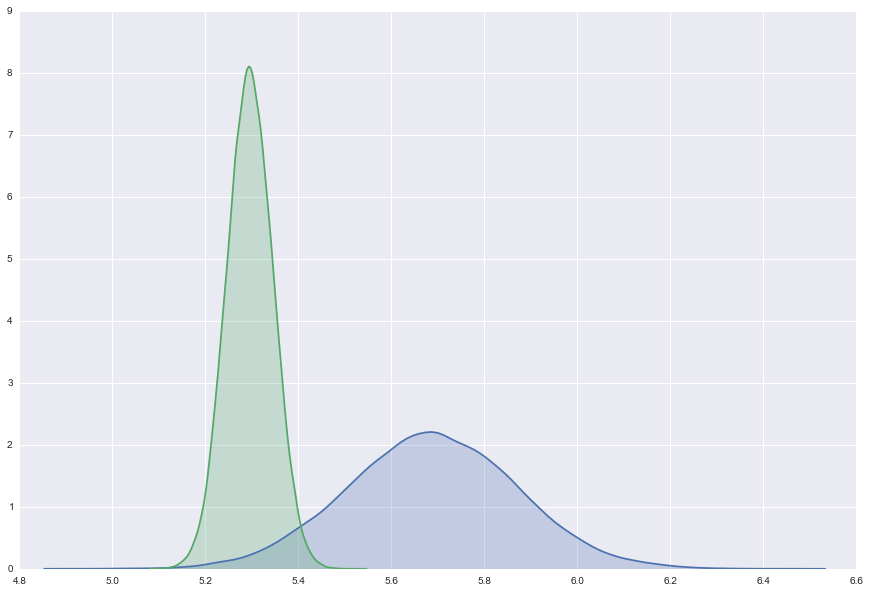

In [121]:
fig = plt.figure(figsize=(15, 10))
for ar, posterior in zip(posteriors, [12, 10]):
    sns.kdeplot(ar * posterior, shade=True)

In [56]:
[a*b for a, b in zip([21, 15, 21], [ 0.06752922,  0.08941427,  0.07533386])]

[1.41811362, 1.34121405, 1.5820110600000001]

In [57]:
[a*b for a, b in zip([751, 568, 212], [ 0.06752922,  0.08941427,  0.07533386])]

[50.71444422, 50.787305360000005, 15.97077832]

In [58]:
[a*b for a, b in zip([1214, 950, 212], [ 0.06752922,  0.08941427,  0.07533386])]

[81.98047308, 84.9435565, 15.97077832]

0.72675

In [66]:
1000 * 0.85 * 0.90# * 0.95

765.0

In [65]:
2000 * 0.85# * 0.90

1700.0

In [64]:
3000 * 0.85

2550.0

In [67]:
3000 + 1700 + 765

5465

In [68]:
2550 + 1530 + 726

4806

In [70]:
(5465 - 4806)/5465.0

0.12058554437328453

In [71]:
1.0 / ((5465 - 4806)/5465.0)

8.292867981790593

In [117]:
from math import sqrt

sqrt(1000 * 0.47 * (1 - 0.47))

15.782902141241326